<a href="https://colab.research.google.com/github/mochradja/DataScience/blob/main/Data_LinearRegression_DataTopInstagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('sample_data/top_instagram.csv')
df

,Rank,Channel Info,Influence score,Posts,Followers,Total Likes,Country or Region
0,1,cristiano,92,3.3k,439.7,28.40,Spain
1,2,kyliejenner,91,6.9k,336.3,57.10,United States
2,3,leomessi,90,855,325.8,5.80,Argentina
3,4,selenagomez,93,1.8k,318.4,11.40,United States
4,5,therock,91,6.5k,314.6,12.30,United States
...,...,...,...,...,...,...,...
95,96,433,79,20.6k,49.7,17.60,Netherlands
96,97,michelleobama,85,571,49.4,0.41,United States
97,98,jamesrodriguez10,86,1.0k,49.3,1.50,Colombia
98,99,charlidamelio,80,119,48.4,0.51,United States


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                100 non-null    int64  
 1   Channel Info        100 non-null    object 
 2   Influence score     100 non-null    int64  
 3   Posts               100 non-null    object 
 4   Followers           100 non-null    float64
 5   Total Likes         100 non-null    float64
 6   Country or Region   100 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


In [ ]:
df.isnull().sum()

Rank                  0
Channel Info          0
Influence score       0
Posts                 0
Followers             0
Total Likes           0
Country or Region     0
dtype: int64

In [ ]:
df.columns

Index(['Rank ', 'Channel Info', 'Influence score ', 'Posts ', 'Followers ',
       'Total Likes', 'Country or Region '],
      dtype='object')

In [ ]:
df = df.rename(columns={
    'Rank ': 'Rank', 
    'Influence score ': 'Influence score', 
    'Followers ': 'Followers', 
    'Country or Region ': 'Country or Region',
    'Posts ': 'Posts'})
df.columns

Index(['Rank', 'Channel Info', 'Influence score', 'Posts', 'Followers',
       'Total Likes', 'Country or Region'],
      dtype='object')

# Merubah data yang terdapat huruf K didalamnya menjadi angka saja

In [ ]:
def to_float_data(data):
  hasil = data.replace('k', '')
  hasil = float(hasil)
  if 'k' in data:
     hasil = hasil * 1000
  return hasil

df['Post'].apply(to_float_data)

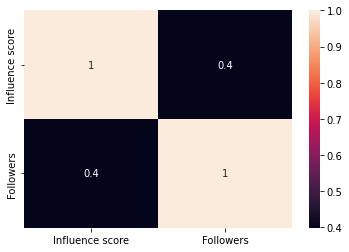

In [ ]:
sns.heatmap(df[['Influence score', 'Followers']].corr(), annot=True)

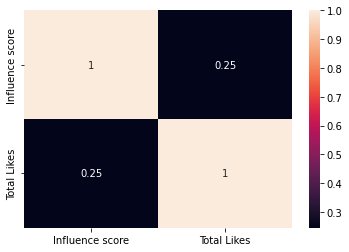

In [ ]:
sns.heatmap(df[['Influence score', 'Total Likes']].corr(), annot=True)

In [ ]:
x = df[['Followers', 'Total Likes']]
y = df[['Influence score']]

In [ ]:
# Training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=10)

In [ ]:
# Membuat model

from sklearn.linear_model import LinearRegression

otak = LinearRegression()
otak.fit(x_train, y_train)

LinearRegression()

In [ ]:
otak.intercept_, otak.coef_

(array([80.16910788]), array([[0.03443662, 0.11114237]]))

In [ ]:
otak.score(x_test, y_test)

0.08739846247865046

In [ ]:
y_predict = otak.predict(x_test)

evaluasi = pd.DataFrame({
    'Actual': y_test.values.flatten(),
    'Predicted' : y_predict.flatten()
    })

evaluasi.head(10)

,Actual,Predicted
0,89,86.208049
1,89,87.878873
2,88,82.870046
3,70,83.345758
4,85,82.563722
5,93,92.400752
6,86,82.079045
7,86,82.890708
8,88,83.248862
9,86,82.740456


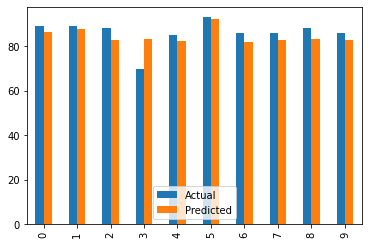

In [ ]:
evaluasi.head(10).plot(kind='bar')

In [ ]:
pip install gradio

In [ ]:
import gradio as gr

def predict(followers, Total_Likes):
    return otak.predict([[followers, Total_Likes]])[0][0]

demo = gr.Interface(predict, 
                    [gr.Number(label="Followers"), gr.Number(label="Total Likes")], 
                    gr.Number())

demo.launch()


Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://24671.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7fd235004850>,
 'http://127.0.0.1:7862/',
 'https://24671.gradio.app')